In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import norm
import matplotlib.lines as mlines
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from config import ORDER, JOURNAL_MAP

plt.rcParams["font.family"] = "Arial"
plt.rcParams['legend.title_fontsize'] = 7
plt.rcParams["text.usetex"] = True

df_sample = pd.read_csv("../data/focal_papers.csv")
df_generated = pd.read_csv("../data/generated_references.csv")
df_ground_truth = pd.read_csv("../data/ground_truth_references.csv")

# existing vs non-existent
df_existing = df_generated[df_generated["Exists"] == 1.0]
df_non_existent = df_generated[df_generated["Exists"] == 0.0]

/var/folders/kq/bwvwl1hd4g12lmk871x7q_br0000gn/T/ipykernel_11394/2153734850.py:18: DtypeWarning: Columns (4,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df_generated = pd.read_csv("../data/generated_references.csv")


In [2]:
existing_gen_all = {'Nature': 2773,
 'Science': 2633,
 'The New England Journal of Medicine': 1504,
 'PNAS': 1208,
 'Cell': 1026,
 'The Lancet': 902,
 'Physical Review Letters': 732,
 'JAMA': 675,
 'Chemical Reviews': 670,
 'Circulation': 524,
 }

existing_journals_compare = pd.DataFrame(existing_gen_all.items())
existing_journals_compare.columns = ["Journal_Name", "Value"]
existing_journals_compare["Type"] = "generated"

journal_map = {
    "Nature": ["nature"],
    "Science": ["science"],
    "The New England Journal of Medicine": ["n engl j med", "n. engl. j. med.", "nejm", "new england journal of medicine", "the new england journal of medicine"],
    "PNAS": ["pnas", "proceedings of the national academy of sciences", "proceedings of the national academy of sciences of the united states of america"],
    'Cell': ["cell", "cell press"],
    'The Lancet': ["lancet", "the lancet"],
    "Physical Review Letters": ["physical review letters", "phys. rev. lett.", "phys rev lett", "prl"],
    'JAMA': ["jama", "jama network", "jama network open"],
    'Chemical Reviews': ["chem. rev.", "chem rev", "chemical reviews", "chemical reviews journal"],
    'Circulation': ["circulation", "circulation research"],
}

extracted_existing_journals = pd.DataFrame([
    {
        "Journal_Name": j,
        "Value": df_existing["Publication Venue"].str.lower().isin(names).sum(),
        "Type": "extracted",
    }
    for j, names in journal_map.items()
])

extraction_method_journals = pd.concat(
    [
        existing_journals_compare,
        extracted_existing_journals
    ]
)

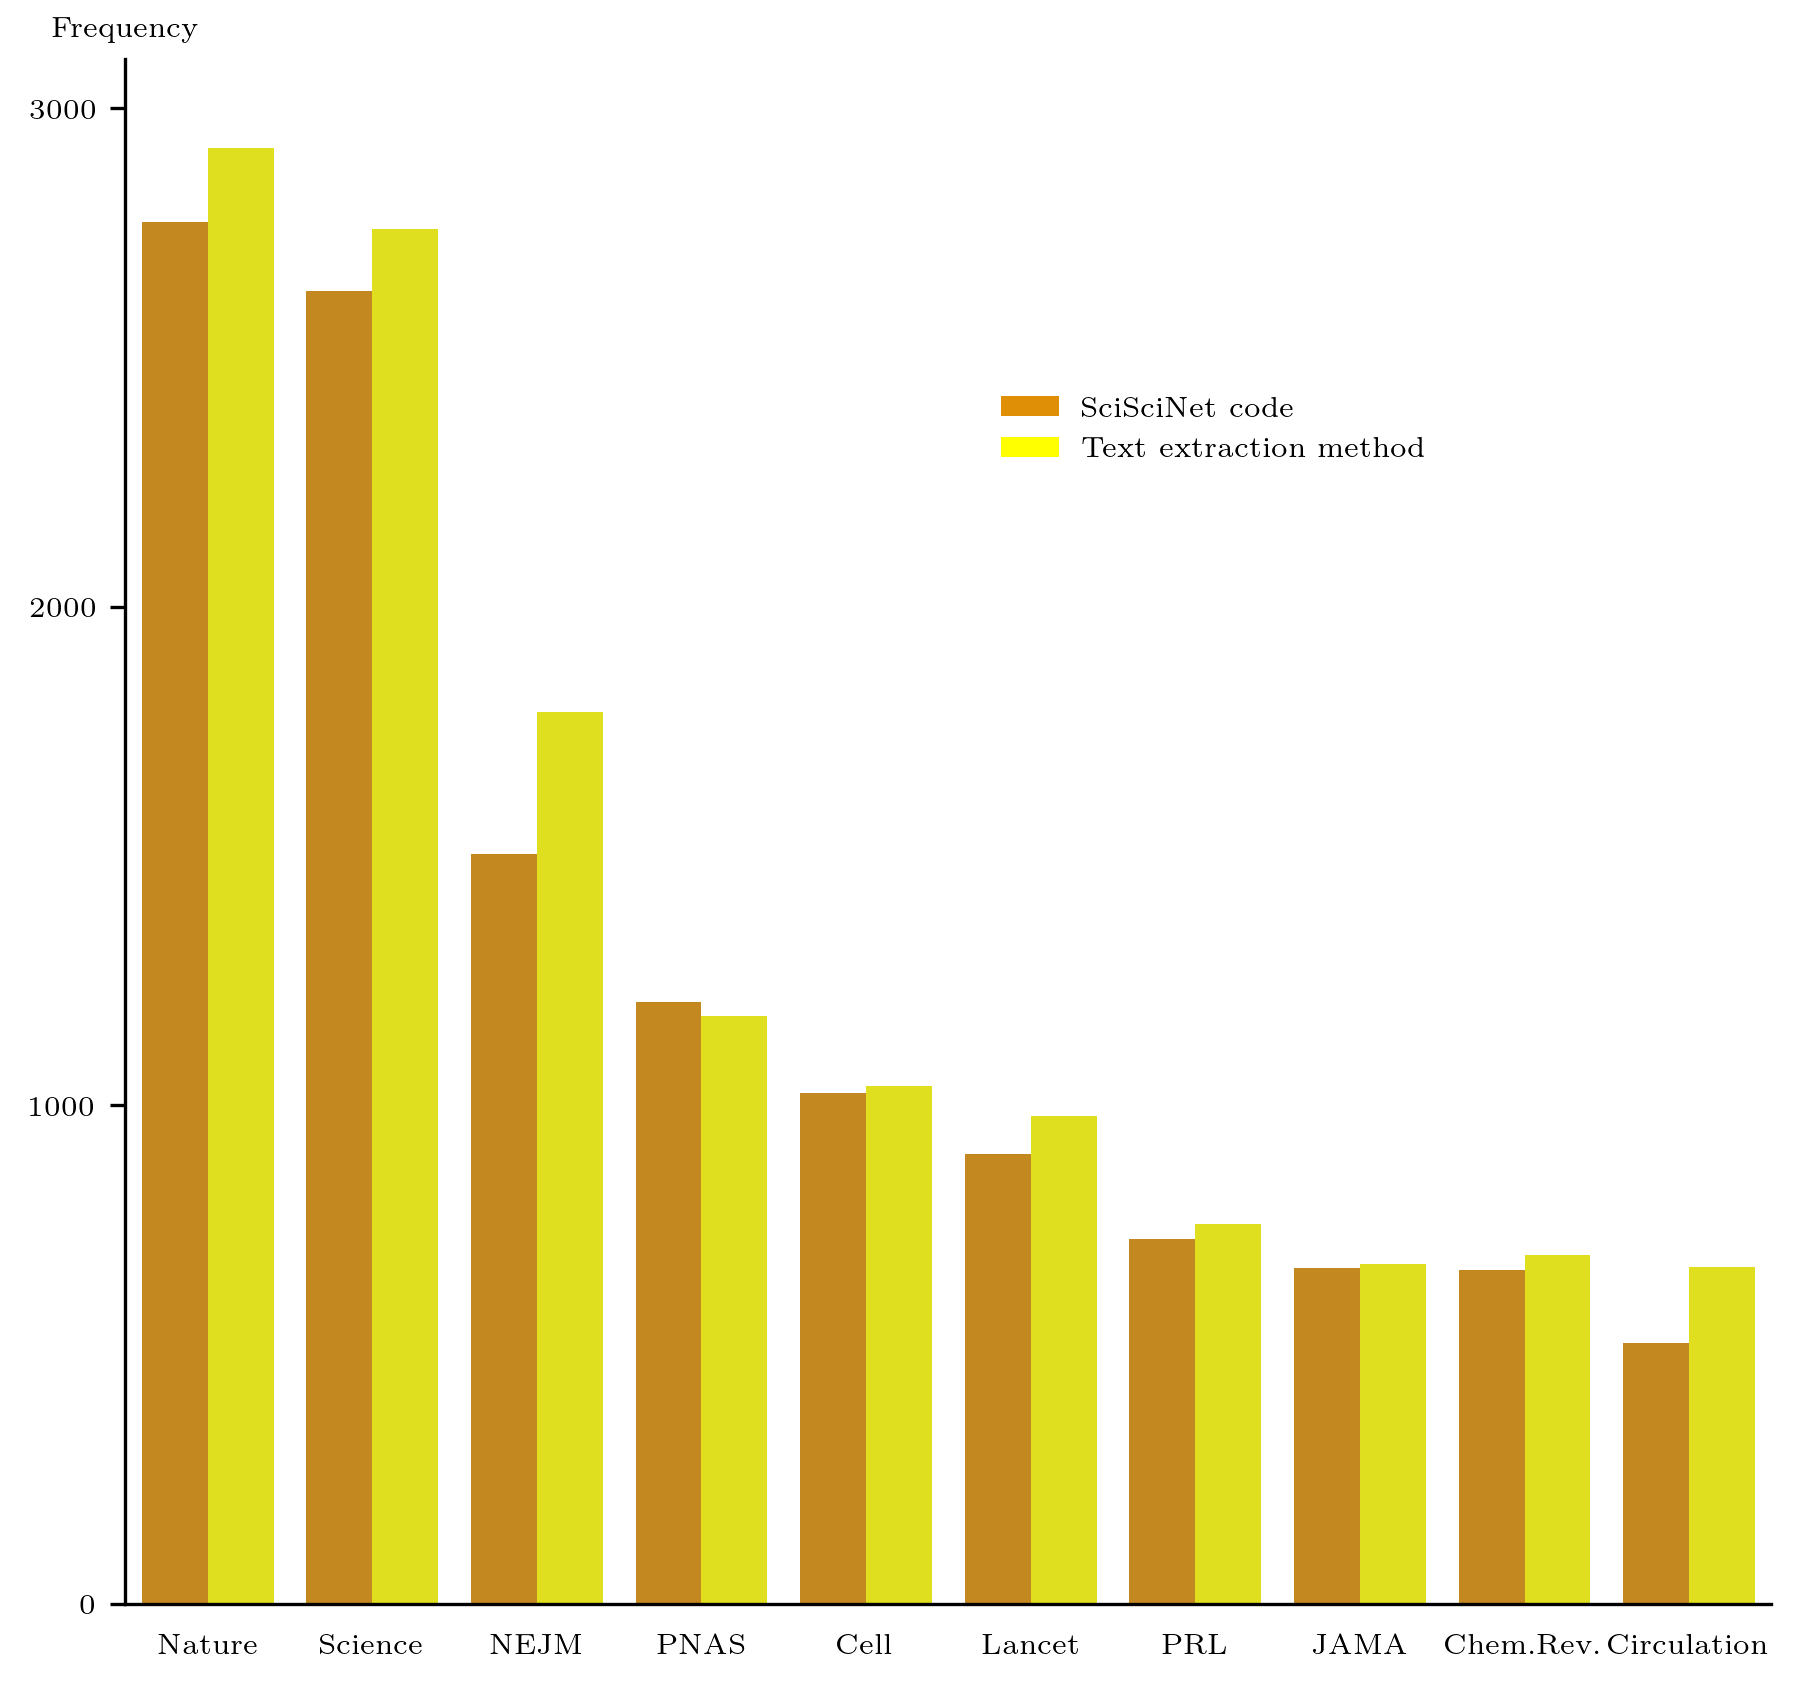

In [3]:
## Figure 4
Figure4, ax4 = plt.subplot_mosaic(
    [
        ['B'],
    ],
    figsize=(7.08,6.69),
    dpi=300,
    gridspec_kw={'wspace': 0.1, 'hspace': 0.35},
)

sns.barplot(
    x='Journal_Name',
    y='Value',
    hue='Type',
    data=extraction_method_journals,
    hue_order=["generated", "extracted"],
    palette=["#de8f05", "yellow"], # "#029e73", "#d55e00"
    ax=ax4["B"],
)

ax4["B"].legend().set_visible(False)
ax4["B"].tick_params(bottom=False)

ax4["B"].set(ylim=(0, 3100))
ax4["B"].set(xlim=(-0.5, 9.5))
ax4["B"].set_xlabel("", fontsize=7)
ax4["B"].set_ylabel("", fontsize=7)
ax4["B"].set_ylabel("Frequency", fontsize=7, rotation=0)
ax4["B"].yaxis.set_label_coords(0.0, 1.01)
ax4['B'].set_xticks(ticks=[0,1,2,3,4,5,6,7,8,9])
ax4['B'].set_xticklabels(
    labels=[
        r"\scriptsize{Nature}", 
        r"\scriptsize{Science}",
        r"\scriptsize{NEJM}",
        r"\scriptsize{PNAS}",
        r"\scriptsize{Cell}",
        r"\scriptsize{Lancet}",
        r"\scriptsize{PRL}",
        r"\scriptsize{JAMA}",
        r"\scriptsize{Chem.Rev.}",
        r"\scriptsize{Circulation}",
    ], fontsize=7)
ax4["B"].set_yticks([0,1000,2000,3000], labels=["0","1000","2000","3000"], fontsize=7)
ax4["B"].set_title("")
sns.despine(ax=ax4["B"],left=False, bottom=False)

# legend
legend_elements = [
    Patch(facecolor='#de8f05', edgecolor=None, label='SciSciNet code'),
    Patch(facecolor='yellow', edgecolor=None, label='Text extraction method'),
]

ax4["B"].legend(
    handles=legend_elements,
    loc='upper right',
    title='',
    title_fontsize=7,
    fontsize=7,
    frameon=False,
    bbox_transform=Figure4.transFigure,
    bbox_to_anchor=(0.75, 0.725),
)